# Test Function Visualization: 2d

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

## Test Functions

In [2]:
def rosenbrock(x):
    """
    rosenbrock evaluates Rosenbrock function at vector x

    Parameters
    ----------
    x : array
        x is a D-dimensional vector, [x1, x2, ..., xD]

    Returns
    -------
    float
        scalar result
    """
    D = len(x)
    i, iplus1 = np.arange(0,D-1), np.arange(1,D)
    return np.sum(100*(x[iplus1] - x[i]**2)**2 + (1-x[i])**2)


def goldstein_price(x):
    """
    goldstein_price evaluates Goldstein-Price function at vector x

    Parameters
    ----------
    x : array
        x is a 2-dimensional vector, [x1, x2]

    Returns
    -------
    float
        scalar result
    """
    a = (x[0] + x[1] + 1)**2
    b = 19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2
    c = (2*x[0] - 3*x[1])**2
    d = 18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2
    return (1. + a*b) * (30. + c*d)


def bartels_conn(x):
    """
    bartels_conn evaluates Bartels-Conn function at vector x

    Parameters
    ----------
    x : array
        x is a 2-dimensional vector, [x1, x2]

    Returns
    -------
    float
        scalar result
    """
    a = np.abs(x[0]**2 + x[1]**2 + x[0]*x[1])
    b = np.abs(np.sin(x[0]))
    c = np.abs(np.cos(x[1]))
    return a + b +c


def egg_crate(x):
    """
    egg_crate evaluates Egg Crate function at vector x

    Parameters
    ----------
    x : array
        x is a 2-dimensional vector, [x1, x2]

    Returns
    -------
    float
        scalar result
    """
    return x[0]**2 + x[1]**2 + 25.*(np.sin(x[0])**2 + np.sin(x[1])**2)

## Surface Generation

In [3]:
def surface(fx, start=-30, stop=30, num=60):
    """
    surface evaluates fx at regularly spaced grid of points

    Parameters
    ----------
    fx : func
        fx is a vector valued function that returns a scalar result
    start : float
        lower bound of the coordinate grid
    stop : float
        upper bound of the coordinate grid
    num : int
        number of points along one dimension of the grid

    Returns
    -------
    array
        2D array formed by evaluating fx at each grid point
    """
    x = np.linspace(start=start, stop=stop, num=num)
    x1, x2 = np.meshgrid(x, x, indexing='ij')
    X = np.vstack((x1.ravel(), x2.ravel()))
    z = np.apply_along_axis(fx, 0, X).reshape(num,num)
    return x1, x2, z

## Initial Points

In [4]:
def tilex0(**params):
    """Return tiled initial position x0 based on test function."""
    func = params['func']
    if func in set(('rosenbrock','goldstein_price')):
        x1 = np.array([-1.5,0.0,1.5])
        x2 = np.array([1.8,0.8,-0.8,-1.8])
        x0s = np.transpose([np.tile(x1, len(x2)), np.repeat(x2, len(x1))])
        return x0s
    elif func in set(('bartels_conn','egg_crate')):
        x1 = np.array([-3.5,0.0,3.5])
        x2 = np.array([4.,1.5,-1.5,-4.])
        x0s = np.transpose([np.tile(x1, len(x2)), np.repeat(x2, len(x1))])
        return x0s
    raise ValueError('no tiling for function named: {0}', func)

## Rosenbrock

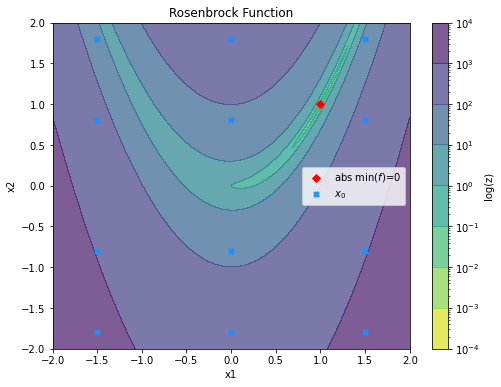

In [5]:
x1, x2, z = surface(rosenbrock, start=-2, stop=2, num=500)
expmin, expxkmin = 0., [1.,1.]
expminstr = 'abs $\\min(f)$={0:.0f}'.format(expmin)

x0s = tilex0(func='rosenbrock')

fig = plt.figure(figsize=(8,6))
cs = plt.contourf(x1, x2, z, locator=ticker.LogLocator(), 
                  cmap='viridis_r', alpha=0.7)
plt.scatter(expxkmin[0], expxkmin[1], marker='D', c='red', s=30,
            label=expminstr)
plt.scatter(x0s[:,0], x0s[:,1], marker='X', c='dodgerblue', s=30,
            label='$x_0$')
plt.title('Rosenbrock Function')
plt.xlabel('x1')
plt.xlim((-2,2))
plt.ylabel('x2')
plt.ylim((-2,2))
plt.colorbar(cs, label='log(z)')
plt.legend()
plt.savefig(os.path.join('./sims/rosenbrock-plot2d.png'))
plt.show()

## Goldstein-Price

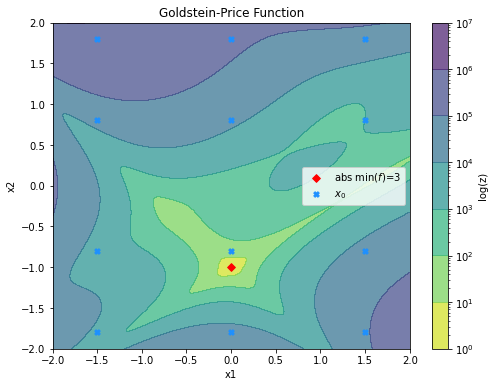

In [6]:
x1, x2, z = surface(goldstein_price, start=-2, stop=2, num=500)
expmin, expxkmin = 3., [0.,-1.]
expminstr = 'abs $\\min(f)$={0:.0f}'.format(expmin)

x0s = tilex0(func='goldstein_price')

fig = plt.figure(figsize=(8,6))
cs = plt.contourf(x1, x2, z, locator=ticker.LogLocator(), 
                  cmap='viridis_r', alpha=0.7)
plt.scatter(expxkmin[0], expxkmin[1], marker='D', c='red', s=30,
            label=expminstr)
plt.scatter(x0s[:,0], x0s[:,1], marker='X', c='dodgerblue', s=30,
            label='$x_0$')
plt.title('Goldstein-Price Function')
plt.xlabel('x1')
plt.xlim((-2,2))
plt.ylabel('x2')
plt.ylim((-2,2))
plt.colorbar(cs, label='log(z)')
plt.legend()
plt.savefig(os.path.join('./sims/goldstein_price-plot2d.png'))
plt.show()

## Bartels-Conn

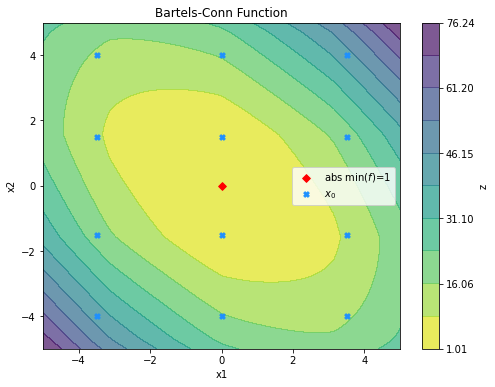

In [7]:
x1, x2, z = surface(bartels_conn, start=-5, stop=5, num=500)
expmin, expxkmin = 1., [0.,0.]
expminstr = 'abs $\\min(f)$={0:.0f}'.format(expmin)

x0s = tilex0(func='bartels_conn')

fig = plt.figure(figsize=(8,6))
cs = plt.contourf(x1, x2, z, locator=ticker.LinearLocator(), 
                  cmap='viridis_r', alpha=0.7)
plt.scatter(expxkmin[0], expxkmin[1], marker='D', c='red', s=30,
            label=expminstr)
plt.scatter(x0s[:,0], x0s[:,1], marker='X', c='dodgerblue', s=30,
            label='$x_0$')
plt.title('Bartels-Conn Function')
plt.xlabel('x1')
plt.xlim((-5,5))
plt.ylabel('x2')
plt.ylim((-5,5))
plt.colorbar(cs, label='z')
plt.legend()
plt.savefig(os.path.join('./sims/bartels_conn-plot2d.png'))
plt.show()

## Egg Crate

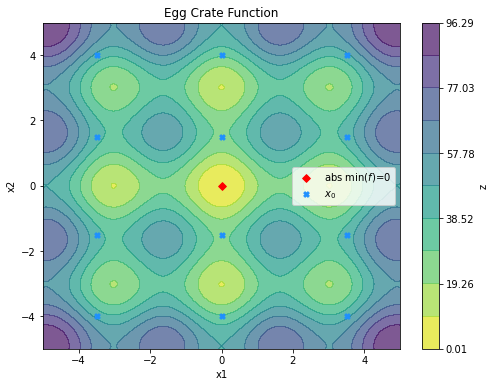

In [8]:
x1, x2, z = surface(egg_crate, start=-5, stop=5, num=500)
expmin, expxkmin = 0., [0.,0.]
expminstr = 'abs $\\min(f)$={0:.0f}'.format(expmin)

x0s = tilex0(func='egg_crate')

fig = plt.figure(figsize=(8,6))
cs = plt.contourf(x1, x2, z, locator=ticker.LinearLocator(), 
                  cmap='viridis_r', alpha=0.7)
plt.scatter(expxkmin[0], expxkmin[1], marker='D', c='red', s=30,
            label=expminstr)
plt.scatter(x0s[:,0], x0s[:,1], marker='X', c='dodgerblue', s=30,
            label='$x_0$')
plt.title('Egg Crate Function')
plt.xlabel('x1')
plt.xlim((-5,5))
plt.ylabel('x2')
plt.ylim((-5,5))
plt.colorbar(cs, label='z')
plt.legend()
plt.savefig(os.path.join('./sims/egg_crate-plot2d.png'))
plt.show()